# Exercise II

## K-Nearest Neighbors (KNN)

[KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is a simple and useful non-parametric method that is commonly used for both classification and regression. It relies on having some method of calculating distance between data points, and using the the "nearest" observations to predict the target value for new ones.

<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/1024px-KnnClassification.svg.png" alt="KNN Illustration" width="400"/>
    <figcaption>
        <i>
            Example of k-NN classification. The test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).
            <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">
                Wikipedia
            </a>
        </i>
    </figcaption>
</figure>

### The Curse of Dimensionality


```{admonition} The Curse of Dimensionality
    :class: note
> *The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience. [Wikipedia](https://en.wikipedia.org/wiki/Curse_of_dimensionality)*

**KNN normally performs better with a limited number of features**. In simplified terms, distances become increasingly large in higher dimensionality spaces.
```

### Sample Dataset

In this exercise we will use the [Iris Flower Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). This dataset is commonly used for demonstrating simple statistical concepts and therefore `scikit-learn` provides us with a utility function to load it.

In [63]:
import pandas as pd

from sklearn.datasets import load_iris

TARGET_NAME = "class"

# Read a type of dictionary with the dataset as well as some metadata.
iris_dataset = load_iris()

# Read the features and targets.
X = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
y = pd.Series(iris_dataset.target, name=TARGET_NAME)

# Print the dataset's description.
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### Basic Exploration

In [117]:
import numpy as np

# Set Pandas floating point display precision.
pd.set_option("precision", 2)

# Class colors
COLORS = "rgba(255, 0, 0, 0.3)", "rgba(0, 255, 0, 0.3)", "rgba(0, 0, 255, 0.3)"

# Create a unified dataframe.
data = pd.concat([X, y], axis="columns")

# Set class background color
def set_class_color(class_index: str) -> str:
    return f"background-color: {COLORS[class_index]};"

def set_class_name(class_index: str) -> str:
    return iris_dataset.target_names[class_index]

# Select some sample indices
sample_indices = np.linspace(0, len(data) - 3, 3, dtype=int)
sample_indices = [index for i in sample_indices for index in range(i, i + 3)]

# Display table
data.iloc[sample_indices, :].style.applymap(
    set_class_color, subset=[TARGET_NAME]    
).format(
    set_class_name, subset=[TARGET_NAME]
).set_properties(
    **{"border": "1px solid black"}, subset=[TARGET_NAME]
).set_properties(
    **{"text-align": "center"}
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
73,6.10,2.80,4.70,1.20,versicolor
74,6.40,2.90,4.30,1.30,versicolor
75,6.60,3.00,4.40,1.40,versicolor
147,6.50,3.00,5.20,2.00,virginica
148,6.20,3.40,5.40,2.30,virginica
149,5.90,3.00,5.10,1.80,virginica


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [18]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


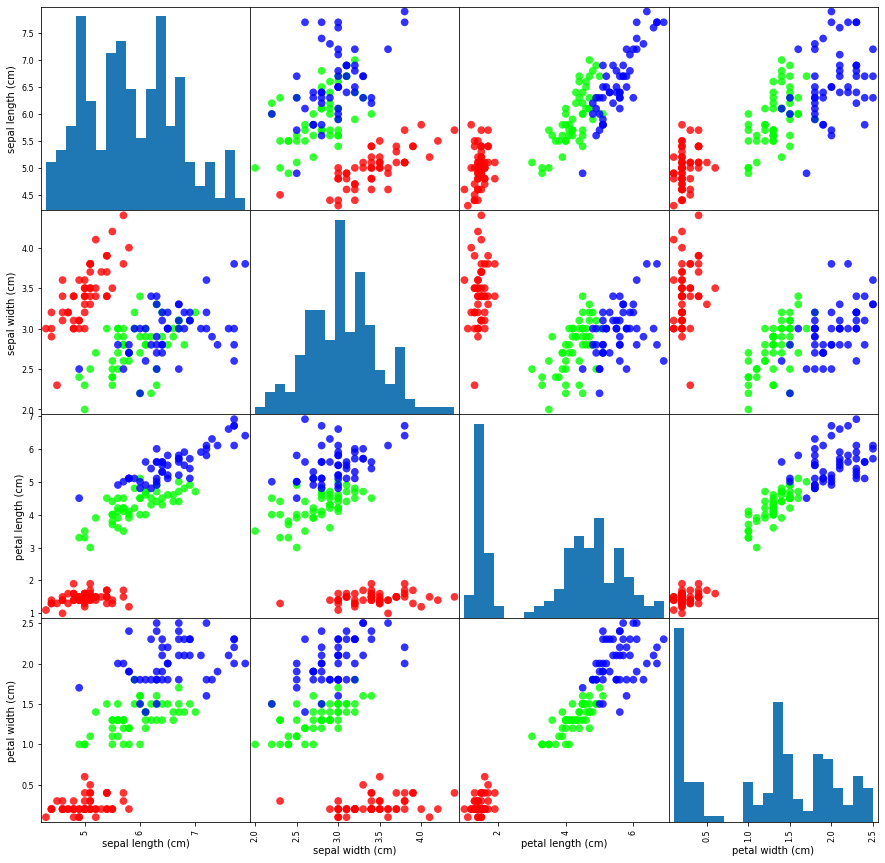

In [127]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap([(1, 0, 0), (0, 1, 0), (0, 0, 1)])
_ = pd.plotting.scatter_matrix(X,
                               c=y,
                               cmap=cmap,
                               figsize=(15, 15),
                               marker='o',
                               hist_kwds={'bins': 20},
                               s=60,
                               alpha=.8)

### Train/Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0,
                                                    test_size=0.25)

In [23]:
from myst_nb import glue

glue("n_train", len(X_train), display=False)
glue("n_test", len(X_test), display=False)

#### 

We now have a training dataset consisting of {glue:}`n_train` observations and a test dataset with {glue:}`n_test` observations.

### Model Creation

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
_ = knn.fit(X_train, y_train)

### Model Evaluation

In [27]:
import numpy as np

y_predicted = knn.predict(X_test)

misclassification_rate = np.mean(y_predicted != y_test)

In [33]:
glue("misclassification_rate", f"{misclassification_rate:.3f}", display=False)
glue("n_correct", (y_predicted == y_test).sum(), display=False)

Our model achieved a misclassification_rate of {glue:}`misclassification_rate`, meaning it correctly predicted {glue:}`n_correct` of {glue:}`n_test` target values in our test set.

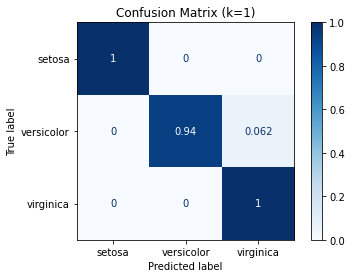

In [39]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(knn,
                             X_test,
                             y_test,
                             display_labels=iris_dataset.target_names,
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp.ax_.set_title("Confusion Matrix (k=1)")